In [ ]:
# analysis of Billboard 200

In [104]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import datetime as datetime 

In [105]:
df = pd.read_csv('./billboard/billboard_rank.csv', parse_dates = ['date'], index_col = ['date'])

In [106]:
df_bts = df[df.artist=='BTS'].sort_index()
#for a in df_bts.groupby('album'):
    #print(df_bts[df_bts.album==a[0]])
    #print(a)

Text(0.5,1,'Rank by album of BTS in Billboard 200')

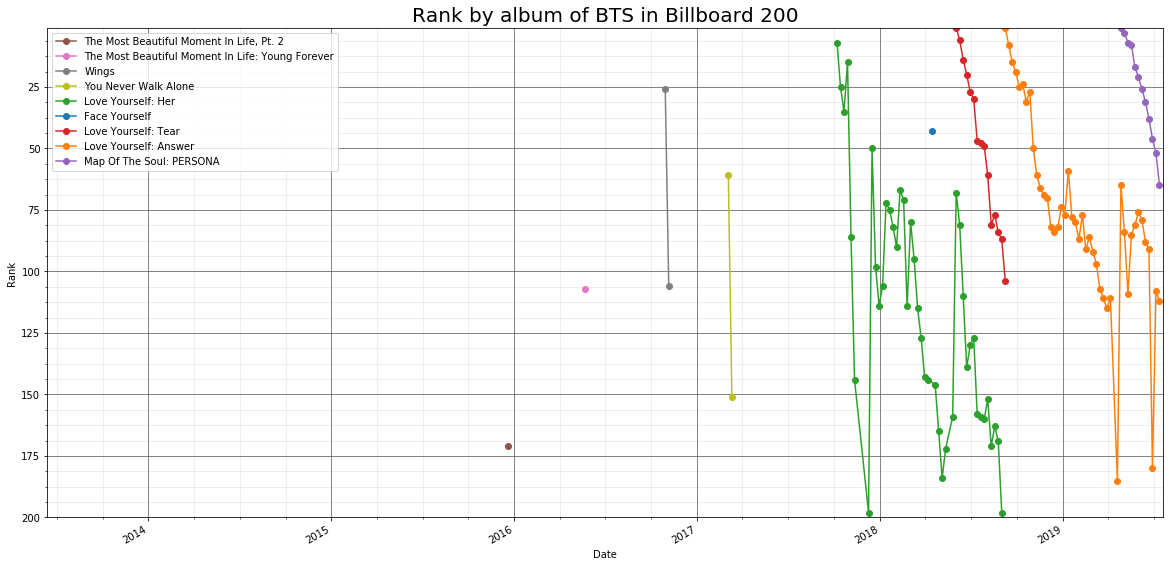

In [110]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)

dend = datetime.datetime.now()
dstart = datetime.datetime(2013,6,13)

ax.set_ylim([200,1])
ax.set_xlim(dstart, dend)

dates = []
for a in df_bts.groupby('album'):
    d = df_bts[df_bts.album == a[0]]
    ax.plot(d.index.values, d['rank'],'o-', label=a[0])
    #print(a)
    dates.append(a[1].index[0])

fig.autofmt_xdate()
#plt.setp(ax.get_xticklabels(), rotation=45)

handles, labels = ax.get_legend_handles_labels()

# sort both labels and handles by dates
labels, handles, dates = zip(*sorted(zip(labels, handles, dates), key=lambda t: t[2]))
ax.legend(handles, labels)

plt.xlabel('Date')
plt.ylabel('Rank')
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.title('Rank by album of BTS in Billboard 200', fontsize='20')

In [123]:
# analysis of Billboard hot100

In [124]:
df = pd.read_csv('./billboard_hot100/billboard_hot100_rank.csv', parse_dates = ['date'], index_col = ['date'])

In [125]:
df_bts = df[df.artist=='BTS'].sort_index()
#for a in df_bts.groupby('song'):
    #print(df_bts[df_bts.song==a[0]])
    #print(a)

Text(0.5,1,'Rank by song of BTS in Billboard top100')

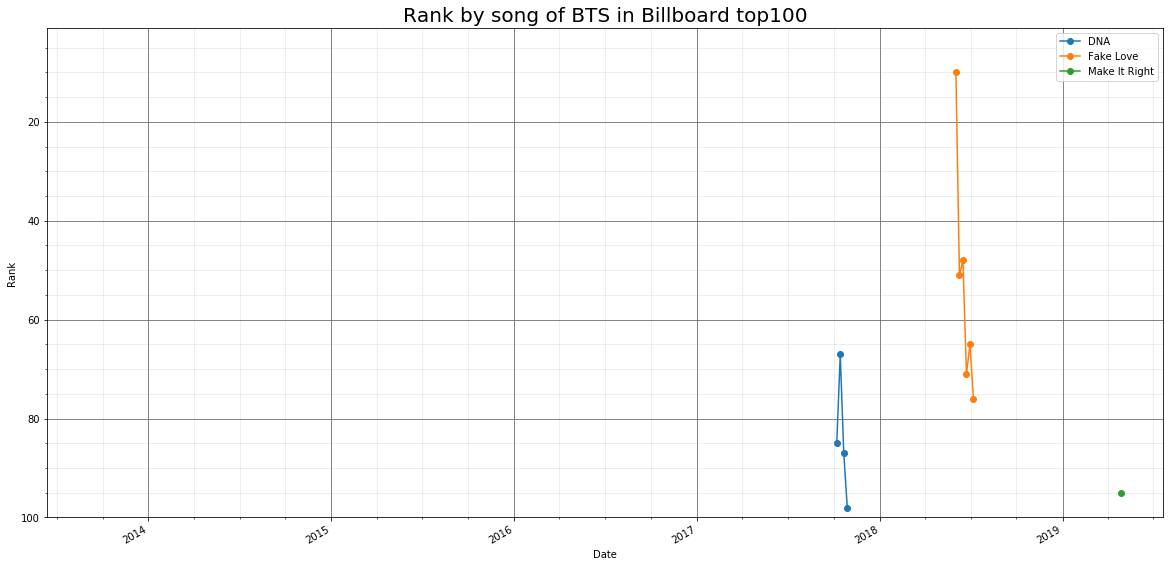

In [126]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)

dend = datetime.datetime.now()
dstart = datetime.datetime(2013,6,13)

ax.set_ylim([100,1])
ax.set_xlim(dstart, dend)

legend = []
for a in df_bts.groupby('song'):
    d = df_bts[df_bts.song == a[0]]    
    ax.plot(d.index.values, d['rank'], 'o-')
    #print(a[0])
    legend.append(a[0])
    
fig.autofmt_xdate()

plt.legend(legend)
plt.xlabel('Date')
plt.ylabel('Rank')
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.title('Rank by song of BTS in Billboard top100', fontsize='20')

In [115]:
# analysis of Billboard artist100

In [127]:
df = pd.read_csv('./billboard_artist100/billboard_artist100_rank.csv', parse_dates = ['date'], index_col = ['date'])

In [128]:
df_bts = df[df.artist=='BTS'].sort_index()

Text(0.5,1,'Billboard Top 100 artist ranking of BTS')

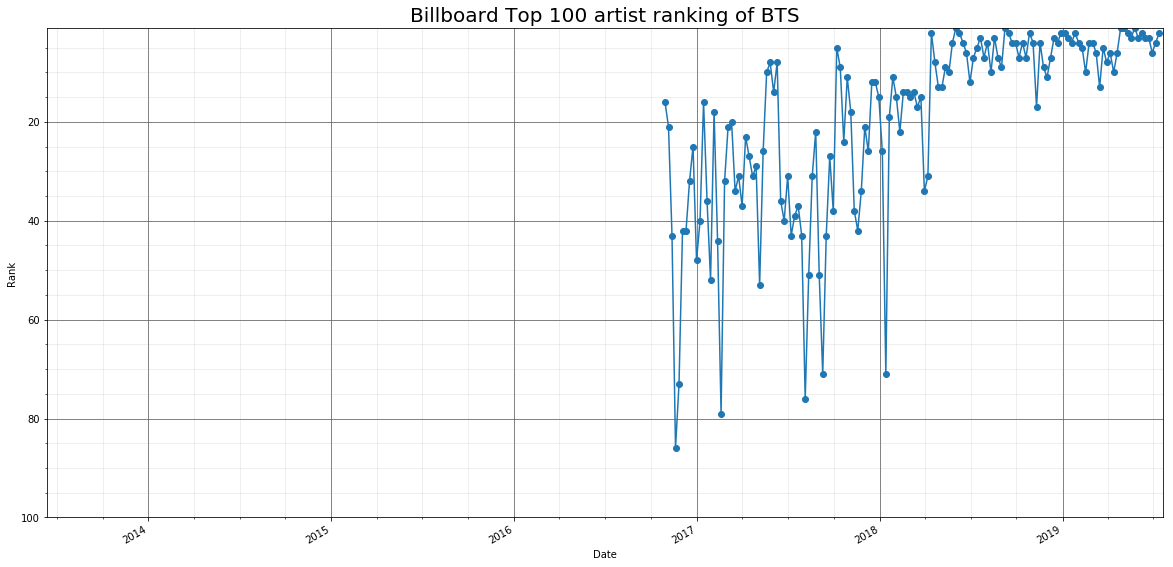

In [129]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)

dend = datetime.datetime.now()
dstart = datetime.datetime(2013,6,13)

ax.set_ylim([100,1])
ax.set_xlim(dstart, dend)

#for a in df_bts.groupby('album'):
    #d = df_bts[df_bts.album == a[0]]    
ax.plot(df_bts.index.values, df_bts['rank'], 'o-')
    #print(a[0])

    
fig.autofmt_xdate()
#plt.setp(ax.get_xticklabels(), rotation=45)
#plt.legend()
plt.xlabel('Date')
plt.ylabel('Rank')
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.title('Billboard Top 100 artist ranking of BTS', fontsize='20')

In [165]:
# analysis of Melon top100

In [166]:
df = pd.read_csv('./melon_rank.csv', parse_dates = ['date'])

In [167]:
df_bts = df[df.artist=='방탄소년단']
#for a in df_bts.groupby('album'):
    #print(df_bts[df_bts.album==a[0]])
    #print(a)

/Users/necronia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


Text(0.5,1,'Melon Top 100 ranking of BTS')

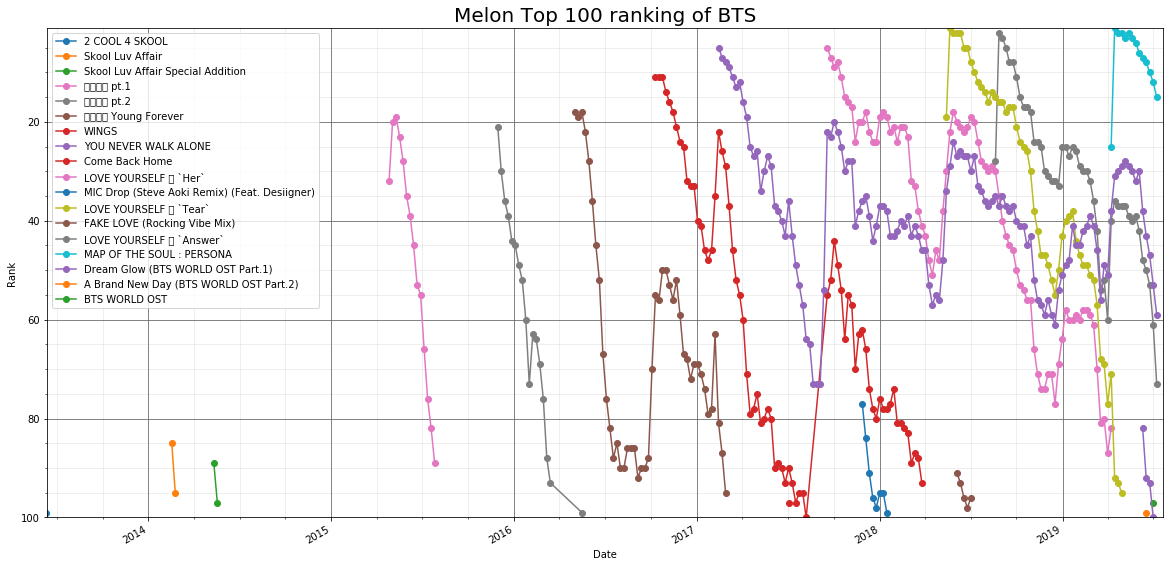

In [178]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)

dend = datetime.datetime.now()
dstart = datetime.datetime(2013,6,13)

ax.set_ylim([100,1])
ax.set_xlim(dstart, dend)

dates = []
for a in df_bts.groupby('album'):    
    d = a[1]
    d['top_rank'] = d.groupby(['date'])['rank'].transform(min)
    d = d[d['top_rank'] == d['rank']]
    #print('s-'*10)
    #print(d)
    #print('e-'*10)
    dates.append(d.iloc[0]['date'])
    d.set_index('date', inplace=True)
    ax.plot(d.index.values, d['rank'], 'o-', label=a[0])    
    
fig.autofmt_xdate()
#plt.setp(ax.get_xticklabels(), rotation=45)

handles, labels = ax.get_legend_handles_labels()
#print(list(zip(labels, dates)))
# sort both labels and handles by dates
labels, handles, dates = zip(*sorted(zip(labels, handles, dates), key=lambda t: t[2]))
ax.legend(handles, labels)

plt.xlabel('Date')
plt.ylabel('Rank')
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.title('Melon Top 100 ranking of BTS', fontsize='20')

In [179]:
# Comparison between billboard200 and Melon

In [180]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import datetime as datetime 

In [181]:
df_billboard = pd.read_csv('./billboard/billboard_rank.csv', parse_dates = ['date'], index_col = ['date'])
df_billboard = df_billboard[df_billboard.artist=='BTS']

df_melon = pd.read_csv('./melon_rank.csv', parse_dates = ['date'])
df_melon = df_melon[df_melon.artist=='방탄소년단']

/Users/necronia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Text(0.5,1,'Top 20 Rank by album of BTS in Melon Top 100')

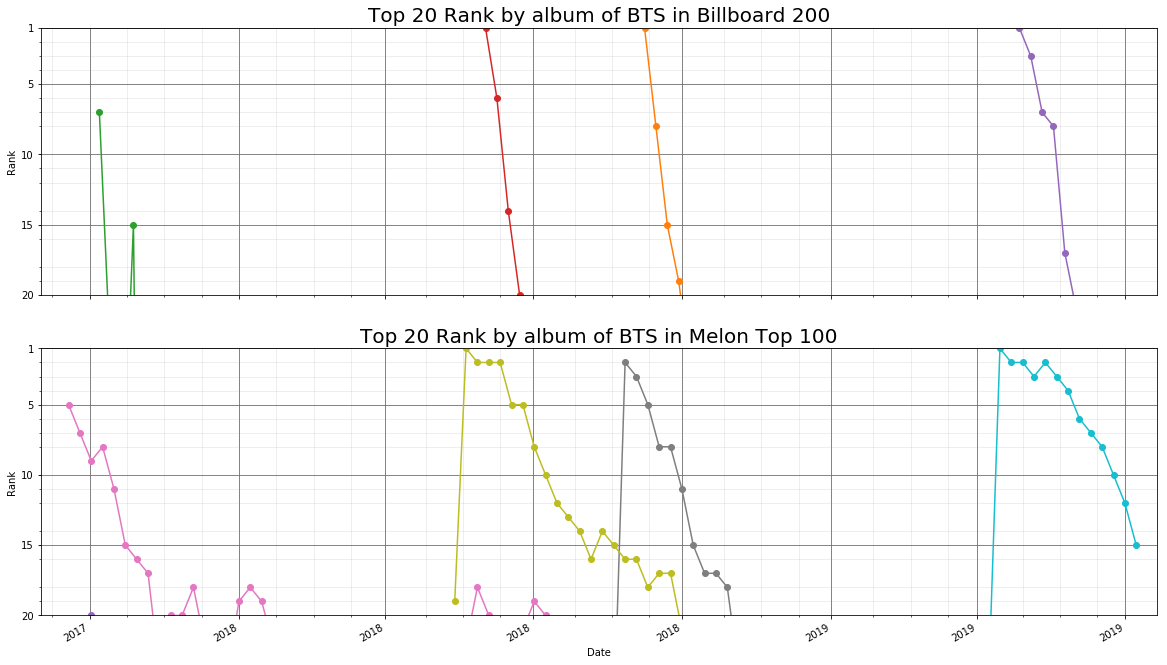

In [223]:
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(2,1,1)

dend = datetime.datetime.now()
dstart = datetime.datetime(2017,9,1)

ax.set_ylim([20,1])
ax.set_xlim(dstart, dend)
ax.set_xticks([datetime.datetime(2017,10,1),datetime.datetime(2018,1,1),datetime.datetime(2018,4,1),datetime.datetime(2018,7,1),datetime.datetime(2018,10,1),datetime.datetime(2019,1,1),datetime.datetime(2019,4,1),datetime.datetime(2019,7,1)])
ax.set_yticks([1, 5, 10, 15, 20])

dates=[]
for a in df_billboard.groupby('album'):
    d = df_billboard[df_billboard.album == a[0]]
    ax.plot(d.index.values, d['rank'],'o-', label=a[0])
    dates.append(a[1].index[0])
    
handles, labels = ax.get_legend_handles_labels()

# sort both labels and handles by dates
labels, handles, dates = zip(*sorted(zip(labels, handles, dates), key=lambda t: t[2]))
#ax.legend(handles, labels)    

plt.xlabel('Date')
plt.ylabel('Rank')
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.title('Top 20 Rank by album of BTS in Billboard 200', fontsize='20')

ax2 = fig.add_subplot(2,1,2)
ax2.set_ylim([20,1])
ax2.set_xlim(dstart, dend)
ax2.set_xticks([datetime.datetime(2017,10,1),datetime.datetime(2018,1,1),datetime.datetime(2018,4,1),datetime.datetime(2018,7,1),datetime.datetime(2018,10,1),datetime.datetime(2019,1,1),datetime.datetime(2019,4,1),datetime.datetime(2019,7,1)])
#ax2.set_xticks([10,20,30,40,50], minor=True)
ax2.set_yticks([1, 5, 10, 15, 20])

dates = []
for a in df_melon.groupby('album'):    
    d = a[1]
    d['top_rank'] = d.groupby(['date'])['rank'].transform(min)
    d = d[d['top_rank'] == d['rank']]
    dates.append(d.iloc[0]['date'])
    d.set_index('date', inplace=True)
    ax2.plot(d.index.values, d['rank'], 'o-', label=a[0])     
    
handles, labels = ax.get_legend_handles_labels()

# sort both labels and handles by dates
labels, handles, dates = zip(*sorted(zip(labels, handles, dates), key=lambda t: t[2]))
#ax2.legend(handles, labels)    

fig.autofmt_xdate()

plt.xlabel('Date')
plt.ylabel('Rank')
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.title('Top 20 Rank by album of BTS in Melon Top 100', fontsize='20')